**Name**: Brandon Loptman

**Total Score**: 20/20

Code Tests:

Completed Tests: 3/3 

Tests Explained: 2/2

Application to Physical Systems Modeling:
8/8 

General:

Run without problems: 1/1

Correct structure: 1/1

Logical flow: 1/1

Good graphical representaions: 3/3 

Graphs have axes, labels, ticks, titles, etc.: 1/1 

**Comments**:

**Description**:

Code Tests

(3 pts) If code tests are suggested, all such tests are completed.  If code tests aren’t suggested, student has articulated their own code tests and executed those tests to show that code is working properly in at least some small number of obvious cases.  The more robust the code tests are, the better.

(2 pts) All code tests are explained in complete sentences in text cells (along with any relevant mathematics).  There is a reasonable amount of explanation of how one knows that the code tests have been passed.

Application of Code to Physical Systems Modeling

(8 pts) Notebook contains a mixture of explanation text in complete sentences (with math where appropriate) and graphs/other visual representations illustrating how the computer model exhibits the relevant phenomena predicted by the mathematical model of the system.  All prompts have been answered.

General

(1 pts) The whole notebook can be re-started and re-run without halting due to any coding errors.

(1 pts) The notebook has the correct general structure (code tests placed in the beginning and application of code to analysis of relevant physical systems after).

(1 pts) Flow of notebook is logical, clear, and concise.

(3 pts) Graphical/visual representations are used to concisely illustrate results of code tests and simulations.

(1 pts) All graphs with axes have labels on axes with units and tick marks where appropriate.


# Project 4 (Path Integral Monte Carlo)

##Abstract

Our project was about numerically approximating ensemble averages of a system using Markov Chain-Monte Carlo (MCMC) simulations. In particular, we applied the Feynmann path integral formulation of quantum mechanics to the quantum harmonic oscillator to determine the ensemble average energy $\langle \hat{H} \rangle$ using the Metropolis algorithm. For our MCMC simulations we used a paths consisting of five points over a range of $\beta \in [.01,10]$. The values of $\langle \hat{H} \rangle$ obtained from our MCMC simulations agreed very strongly with the analytical result, differing on average by only 2.89%.

## Physical System and Model

Equilibrium statistical mechanics is based upon the idea of a partition function which contains all of the essential information about the system under consideration. The partition function $Z$ is the sum over all states of the Boltzmann factor for each state. Recall, that the Boltzmann factor for a state $s$ is given by $e^{-E_{s}/k_{b}T}$ where $E_{s}$ is the energy of state $s$, $k_{b}$ is the Boltzmann's constant, and $T$ is the temperature in Kelvin. This is often written as $e^{E_{s}\beta}$, where $\beta = \tfrac{1}{k_{b}T}$. Thus, the partition function is:

$$
  Z = \sum_{\mbox{all states}} e^{-E_{s}\beta}
$$

The above sum is over all states of the system and thus depends on size of the system and the number of degrees of freedom for each particle. For systems consisting of only a few interacting particles the partition function can be written down exactly, thus the properties of the system can be calculated in a closed form. 

A classic example of a system for which the partition function can be computed exactly is the quantum harmonic oscillator. Recall, that the energy of the quantum harmonic oscillator is given by

$$
  E_{n} = (\tfrac{1}{2} + n) \hbar \omega
$$

where $\omega$ is the angular frequency of the oscillator and 
$n \in (0,1,2,\dots)$. Plugging this into the equation for the parition function we get

$$
  Z = \sum_{n=0}^{\infty} e^{-E_{n}\beta} = e^{-\tfrac{1}{2} \beta \hbar \omega} \sum_{n=0}^{\infty} e^{-n \beta\hbar\omega}
$$

The sum over n above is an infinite geometric series and can be evaluated immediately. The result is

$$
  \sum_{n=0}^{\infty} e^{-n \beta \hbar \omega} = \frac{1}{1 - e^{\beta\hbar\omega}}
$$

Thus, the partition function takes the form 

$$
  Z_{Oscillator} = -\frac{1}{2}\frac{\beta \hbar \omega}{1 - e^{\beta\hbar\omega}}
$$

We can also recall from statistical mechanics that the average energy of a system $\langle \hat{H} \rangle$ is given by

$$
  \langle \hat{H} \rangle = - \frac{\partial}{\partial \beta} \ln{Z}
$$

Thus, the average energy of the quantum harmonic oscillator is given by 

$$
  \langle \hat{H} \rangle_{Oscillator} = \hbar\omega (\tfrac{1}{2} + \tfrac{1}{e^{\beta\hbar\omega}-1})
$$

In general, the partition function cannot be evaluated exactly. Not only this, but if the number of states is large (as it is for real systems) the partition function becomes impossible to compute on a computer. Fortunately, there are methods by which we can still compute properties of systems without explicitly knowing its partition function.

One such way is using Feynmann's path integral formulation of quantum mechanics in conjunction with MCMC. This is called path integral Monte-Carlo. The derivation is laborious (and done by the professor in his notes) so I will omit it here. The relevant results are:

$$
  \langle \hat H\rangle_N = \frac{\int_{\mathbb R^N}d^Nq\,\Phi(\vec q) \,e^{-U(\vec q)}}{\int_{\mathbb R^N}d^Nq\,e^{-U(\vec q)}}, \qquad \Phi(\vec q) = \frac{1}{N}\sum_{i=1}^N\left[V(q_i) + \frac{1}{2}q_i V'(q_i)\right], \qquad U(\vec q) = \sum_{i=1}^N\left[\frac{m}{2(\beta/N)\hbar^2}\left(q_{i+1}-q_i\right)^2 + (\beta/N) V(q_i)\right]
$$

where $\vec q = (q_1, q_2, \dots, q_N)$. To apply the this to MCMC, one needs to sample points from this space according to the un-normalized probability distribution $e^{-U(\vec q)}$ using the Metropolis-Hastings algorithm (this is discussed more in the next section).  

In order to do this in the case of the quantum harmonic oscillator we need to recall the potential of the quantum harmonic oscillator in one dimension is given by
$$
  V = \tfrac{1}{2}m x^{2} \omega^{2}
$$

where $m$ is the mass and $x$ is the displacement from equalibrium of the oscillator.

## Algorithms

The main algorithm we are using to numerically determine $\langle \hat{H} \rangle$ is the Metropolis algorithm. The Metropolis algorithm is a simple algorithm for producing samples from distributions that may otherwise be difficult to sample from.  

Suppose we want to sample from a distribution $\pi$. The Metropolis algorithm works by simulating a Markov Chain, whose stationary distribution is $\pi$. This means that, in the long run, the samples from the Markov chain look like the samples from $\pi$.   

The algorithm runs as follows:
1. Initiate the sequence of samples in a state $s_{1}$ of your own choosing.
2. If $s$ is the current state, propose a new state $s'$ according to a conditional probability distribution of our own choosing, defined such that $r(s'|s)$ is the probability of proposing $s'$ given the current state is $s$.
3. Accept the proposed state, namely add it as the next state in the sample sequence, with probability

$$
  A(s|s') = \mbox{min}(1,\tfrac{p_{s'}}{p_{s}})
$$

If the proposed state is not accepted, add the current state $s$ to your sequence instead as the next state.

4. Repeat from step 2 for a large number of samples.

For our implementation of the Metropolis algorithm for the path integral we closely follow the procedure of Å. Larsen and F. Ravndal in the paper provided by the professor. It is as follows:

1. Start from some arbitrary path $q$.
2. For each point $q_{i}$ in the path, we propose a new point $q_{i}'$ by generating a random value uniformly on $(q_{i} - \Delta,q_{i} + \Delta)$, where $\Delta = 1$.
3. Accept or reject the proposed state according to probability distribution $e^{-U(q)}$. This step is repeated $\bar{n} = 5$ times for each $q_{i}$.
4. Return to step 2 and repeat for each $q_{i}$ in $q$.

Going through all points in the path constitute on Monte Carlo iteration. The reason we repeat step 3 $\bar{n}$ times is because Å. Larsen and F. Ravndal claim this improves convergence to equilibrium.

For the problem of the quantum harmonic oscillator, as we have already seen, the partition function can be found analytically. Thus, we are able to compute whatever ensemble averages we want to exactly. For this reason this elaborate algorithmic approach is not necessary in this specific case, though it does serve as a good example of how to apply the path integral Monte Carlo method to more complex problems where the partition function is not known/cannot be written in a closed form easily.

## Code

The following cell contains the main functions and modules used to obtain our results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
plt.style.use("ggplot")

h_bar = 1 #constant of nature, set to 1 for convenience 

def V(q,m=1,omega=1):
  """
  """
  return 0.5 * m * (omega**2) * (q**2)

def dV(q,m=1,omega=1):
  """
  """
  return m * (omega**2) * q

def Phi(q,m=1,omega=1):
  """
  """
  N = np.size(q)
  term = V(q,m,omega) + (0.5 * q * dV(q,m,omega))
  return np.sum(term)/N

def U(q,beta=1,m=1,omega=1):
  """
  """
  N = np.size(q)
  term = np.zeros(N)

  for i in range(N-1):
    term[i] = (m*(q[i+1]-q[i])**2)/(2*(beta/N)*(h_bar**2)) + (beta/N)*V(q[i])  

  term[N-1] = (m*(q[0]-q[N-1])**2)/(2*(beta/N)*(h_bar**2)) + (beta/N)*V(q[i])

  return np.sum(term)

def prob(U):
  """
  """
  return np.exp(-U)

def exact_H(beta,omega=1):
  """
  """
  return (h_bar * omega) * (0.5 + (np.exp(beta*h_bar*omega)-1)**-1)

def inital_config(N):
  """
  """
  return np.random.uniform(-1,1,N)

def path_integral_mcmc(q,m,beta,omega,num_steps,delta=1,n_bar=5):
  """
  """
  N = np.size(q)
  q_proposed = np.zeros(N)

  p_current = prob(U(q,beta,m,omega))
  p_proposed = 0

  H_avg = np.zeros(num_steps)
  H_avg[0] = Phi(q,m,omega)

  for i in range(num_steps-1):
    for j in range(N):
      for k in range(n_bar):
        q_proposed = np.copy(q)
        q_proposed[j] = np.random.uniform(q[j]-delta,q[j]+delta)

        p_proposed = prob(U(q_proposed,beta,m,omega))

        if np.random.rand() < min(1,p_proposed/p_current):
          q[j] = q_proposed[j]
          p_current = prob(U(q,beta,m,omega))

    H_avg[i+1] = H_avg[i] + (Phi(q,m=1,omega=1)-H_avg[i])/(i+2)

  return q, H_avg

## Results

In the following cells we run code to obtain our results.

In [ ]:
#Running MCMC to approximate <H> for various values of beta.
#Takes awhile to run...
betas_1 = np.array([.1,.3,.5,.7,.9,2,4,6,8,10])
H_avg = np.zeros(np.size(betas_1))

m = 1
omega = 1

N = 5
delta = 1
n_bar = 5
num_steps = np.array([80000,80000,80000,80000,80000,50000,50000,50000,50000,50000])

for i in range(np.size(betas_1)):
  q = inital_config(N)
  q, H = path_integral_mcmc(q,m,betas_1[i],omega,num_steps[i])
  H_avg[i] = H[-1]

In [ ]:
#Getting exact values of <H> for various values of beta.
betas_2 = np.linspace(.01,10,100)
H_avg_exact = exact_H(betas_2,omega)

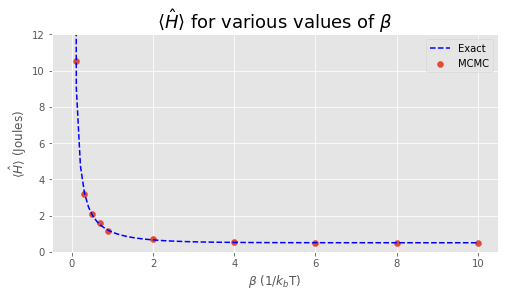

In [ ]:
#Plotting our results.
plt.figure(figsize=(8,4)) 

plt.scatter(betas_1,H_avg,label="MCMC")
plt.plot(betas_2,H_avg_exact,linestyle="--",label="Exact",color="blue")

plt.title(r"$\langle \hat{H} \rangle$ for various values of $\beta$",fontsize=18)
plt.xlabel(r"$\beta$ (1/$k_{b}$T)")
plt.ylabel(r"$\langle \hat{H} \rangle$ (Joules)")

plt.ylim(0,12)

plt.legend()
plt.show()

From the above code cell, we can qualitatively verify that the values of $\langle \hat{H} \rangle$ attained from our path integral Monte Carlo simulation agree very well with the exact values of $\langle \hat{H} \rangle$ found analytically. A simple way we can quantitatively show the accuracy of our results is by calculating the percent error between our approximate values and the exact values of $\langle \hat{H} \rangle$. This is done in the following cell.

In [ ]:
#Calculating percent errors.
H_avg_exact_2 = exact_H(betas_1,omega)

percent_diff = (np.abs(H_avg_exact_2 - H_avg)/H_avg_exact_2)*100
avg = np.sum(percent_diff)/np.size(percent_diff)

print("Percent difference for each beta value: \n", percent_diff,"\n")
print("Average percent differance: ",avg)

Percent difference for each point: 
 [4.95034444 5.01568641 1.1105442  5.4308563  3.32181376 3.45835661
 0.18165948 2.28718827 1.92065033 1.21397751] 

Average percent differance:  2.8891077314405402


Even though we are using a relatively small number of points to form our paths ($N = 5$) the results of our simulation are still very accurate, having an average percent error of 2.89% and a maximum percent error of 5.43%. Because the difference between the approximate and exact values of $\langle \hat{H} \rangle$ is very small (that is, the approximate values are very nearly equal to the exact values) we can be fairly confident that our results are trustworthy and accurate.

If we were to increase the value of $N$ our results would most likely become even closer to the true values of $\langle \hat{H} \rangle$.

## References

**Textbooks:**  
* [*A Guide to Monte-Carlo Simulations in Statistical Physics*](https://el.us.edu.pl/ekonofizyka/images/6/6b/A_guide_to_monte_carlo_simulations_in_statistical_physics.pdf) by David P. Lanadu and Kurt Binder

**Papers:**
* [*The harmonic oscillator at finite temperature using path integrals*](https://courses.physics.ucsd.edu/2017/Spring/physics142/Lectures/Lecture14/Larsen.pdf) by Å. Larsen and F. Ravndal

**Lecture Notes:**
* [Professor Samani's notes on MCMC and Feynmann Path Integral](https://drive.google.com/drive/u/1/folders/1nergRg0IK9ks8kbN0rmyAjaaxSTvAQY6)

* [Hitoshi Murayama's (UC Berkeley) note on the Feynmann Path Integral](http://hitoshi.berkeley.edu/221A/pathintegral.pdf)